## Week 2. Exploratory Data Analysis

### Part 1: Descriptive Statistics

- Data types
- Why do we need descriptive statistics?
- Descriptive statistics with Python
- Univariate data analysis: 
    - frequency tables and histograms
- Multivariate data analysis: 
    - correlation and contingency tables
- Part 2: Visualization overview

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

__Resources:__  
- https://numpy.org
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://seaborn.pydata.org/ 

#### Element-wise operations on data arrays (why do we need NumPy?)

In [2]:
## Example: element-wise division with Python lists:
x1 = [1, 2, 3, 4]
x2 = [10, 20, 30, 40]


In [3]:
## x2 / x1 
## there are no mathematical operations with lists except basic functions sum(), map() etc.

In [4]:
## with list comprehension:
[x / y for x,y in zip(x2,x1) ]   
## this is a for loop and will take a long time to compute if L1 and L2 are large lists

[10.0, 10.0, 10.0, 10.0]

In [5]:
## with map():
def division(x, y):
    return(x/y)
list(map(division, x2, x1))

[10.0, 10.0, 10.0, 10.0]

In [6]:
## Numpy arrays can be built from lists
np.array(x1) 

array([1, 2, 3, 4])

In [7]:
np.array(x2) / np.array(x1) # fast element-wise parallelized operation

array([10., 10., 10., 10.])

- array elements must have the same type
- arrays can be multi-dimensional

##### Data types

__Question:__ what Python variable type does each of the following data type map to?

- Continuous numerical
- Discrete numerical
- Categorical ordinal
- Categorical nominal

### Descriptive Statistics for Continuous Variables

Describe a data set containing many data points with a few aggregating parameters

- Count
- Sum
- Minimum
- Maximum
- Range
- Mean
- Variance
- Standard Deviation
- Median
- Quantile
- Mode
- Skewness
- Kurtosis

#### Mean and Median

- Simulated data set: annual incomes (in $1k)

In [8]:
income = np.array([ 83.24,  60.07, 142.92,  62.44,  73.29, 117.47,  42.72,  52.25,
        75.63,  60.1 ,  34.22,  63.85,  59.24,  88.1 ,  20.06,  48.99,
       104.54, 125.72,  24.66,  89.35])
income

array([ 83.24,  60.07, 142.92,  62.44,  73.29, 117.47,  42.72,  52.25,
        75.63,  60.1 ,  34.22,  63.85,  59.24,  88.1 ,  20.06,  48.99,
       104.54, 125.72,  24.66,  89.35])

In [9]:
pd.Series([np.mean(income), np.median(income), np.std(income), np.sum(income)], 
         index = ["mean", 'median', 'standard dev', 'total'])

mean              71.443000
median            63.145000
standard dev      32.003625
total           1428.860000
dtype: float64

In [10]:
# some statistical functions can be computed as methods: note the difference in syntax
pd.Series([income.mean(), income.std(), income.sum()], 
         index = ["mean", 'standard dev', 'total'])

# note: no such method for median

mean              71.443000
standard dev      32.003625
total           1428.860000
dtype: float64

In [11]:
## the CEO walks in:
income1 = np.hstack((income, np.array(2000)))
income1

array([  83.24,   60.07,  142.92,   62.44,   73.29,  117.47,   42.72,
         52.25,   75.63,   60.1 ,   34.22,   63.85,   59.24,   88.1 ,
         20.06,   48.99,  104.54,  125.72,   24.66,   89.35, 2000.  ])

In [12]:
pd.Series([np.mean(income1), np.median(income1), np.std(income1), np.sum(income1)], 
         index = ["mean", 'median', 'standard dev', 'total'])
## note that the outlier (CEO) doesn't have much effect on the median 
## but drives the mean to a much higher value

mean             163.279048
median            63.850000
standard dev     411.889126
total           3428.860000
dtype: float64

##### Median and Quartiles require sorting

In [13]:
## sort the values and find the mid-point
income_sorted = np.sort(income1)
income_sorted
## note that sorting is slow! Mean is easier to scale

array([  20.06,   24.66,   34.22,   42.72,   48.99,   52.25,   59.24,
         60.07,   60.1 ,   62.44,   63.85,   73.29,   75.63,   83.24,
         88.1 ,   89.35,  104.54,  117.47,  125.72,  142.92, 2000.  ])

In [14]:
### How do we compute the Quartiles?:
print(income_sorted[:5], "1st quartile", income_sorted[5:10], "2nd quartile = median", '\n', 
      income_sorted[10:15], "3rd quartile", income_sorted[15:])

[20.06 24.66 34.22 42.72 48.99] 1st quartile [52.25 59.24 60.07 60.1  62.44] 2nd quartile = median 
 [63.85 73.29 75.63 83.24 88.1 ] 3rd quartile [  89.35  104.54  117.47  125.72  142.92 2000.  ]


In [15]:
### use np.quantile for quartiles, quintiles and any custom quantiles
print(np.quantile(income1, q = [0.25, 0.5, 0.75])) ## quartiles

[52.25 63.85 89.35]


##### Central tendency

Central tendency i a statistical measure that identifies a single value as representative of an entire distribution

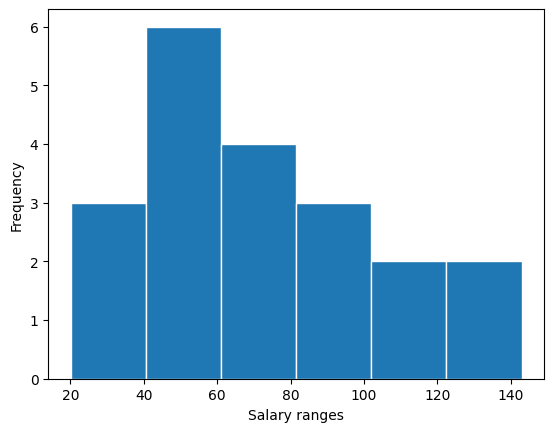

In [16]:
plt.hist(income, bins = 6, edgecolor = 'white') ## how do we optimize the number of bins?
plt.ylabel("Frequency")
plt.xlabel("Salary ranges")
plt.show()

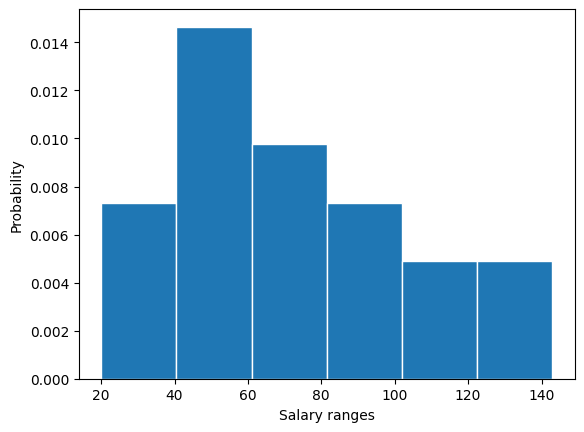

In [17]:
## normalized histogram will show probabilities instead of frequencies

plt.hist(income, bins = 6, density = True, edgecolor = 'white')
plt.ylabel("Probability")
plt.xlabel("Salary ranges")
plt.show()

##### Mean, standard deviation and mode of non-normal data

__Simulated Example: customer account balances (in $1000s)__

- mode is the most frequent data point/range
- the number of modes can be > 1 
- multimodal distributions: mean, median and standard deviation may be less meaningful as descriptive statistics

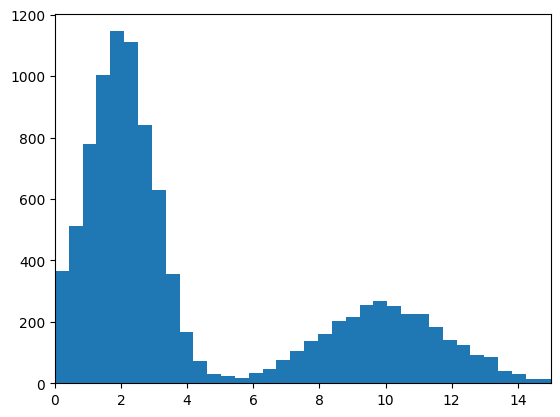

mean            4.392855
median          2.551813
standard dev    3.894594
dtype: float64

In [18]:
np.random.seed(42)
X = abs(np.random.normal(2, 1, 10000))
X[:3000] = np.random.normal(10, 2, 3000)
plt.hist(X, bins = 40)
plt.xlim(0, 15)
plt.show()
pd.Series([np.mean(X), np.median(X), np.std(X)], 
         index = ["mean", 'median', 'standard dev'])

In [19]:
## More stat functions in NumPy

print(np.min(income1)) 
print(income.max())
print(income.argmax())
## try also max, len (count)

20.06
142.92
2


### Real data example: Tips dataset

https://www.kaggle.com/code/sanjanabasu/tips-dataset/data

__Background:__ 
In the United States and Canada, tipping wait staff in restaurants is a way for satisfied customers to show their appreciation for good service. Technically, it’s optional. However, it’s expected that all customers in full-service restaurants will leave a tip. 

In [20]:
### Inspect the dataset in the CSV file
### Inspect Data Dictionary if available
### Read data into a Pandas data frame

data = pd.read_csv("../data/tips.csv")

- Data frame is the main Pandas object for storing and manipulating structured data
- Data frame contains of rows and columns. Row is sometimes refrerred to as Index
- There is no requirement for data types to be consistent across a data frame (unlike NumPy arrays)
- However, each column must contain the same data type

In [21]:
data

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
## create new data columns
data['tip_percentage'] = 100 * data['tip'] / data['total_bill']
data.head() 

,total_bill,tip,gender,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [23]:
## high-level overview of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      244 non-null    float64
 1   tip             244 non-null    float64
 2   gender          244 non-null    object 
 3   smoker          244 non-null    object 
 4   day             244 non-null    object 
 5   time            244 non-null    object 
 6   size            244 non-null    int64  
 7   tip_percentage  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [24]:
## descriptive stats for numerical columns
data.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [25]:
data.describe(include = 'object') ## and for "object" columns

,gender,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


#### Univariate data analysis: continuous numerical data

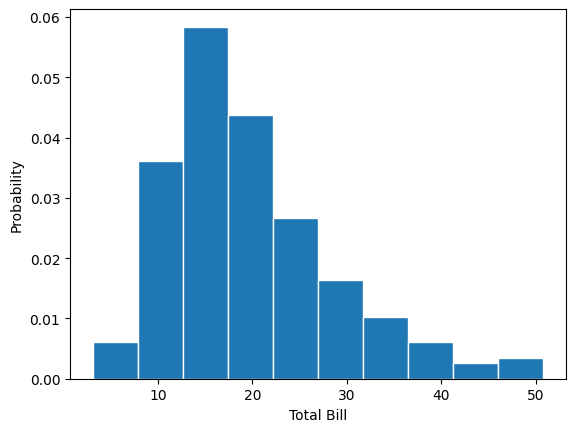

In [26]:
plt.hist(data['total_bill'], density = True, edgecolor = 'white')
plt.ylabel("Probability")
plt.xlabel("Total Bill")
plt.show()

In [27]:
data['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

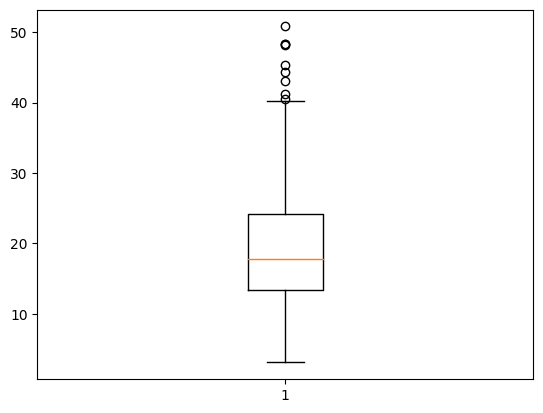

In [28]:
## box plot shows the quartiles and outliers
plt.boxplot(data['total_bill'])
plt.show()

#### Univariate data analysis: categorical data

In [29]:
# frequency table
data['gender'].value_counts()
## find the mode?

Male      157
Female     87
Name: gender, dtype: int64

In [30]:
# probability table
data['gender'].value_counts(normalize = True)

Male      0.643443
Female    0.356557
Name: gender, dtype: float64

##### Discreet numerical (integers): categorical or numerical?

- Answer: depends on a number of factors including the cardinality

In [31]:
## "Size" is an integer column
data['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

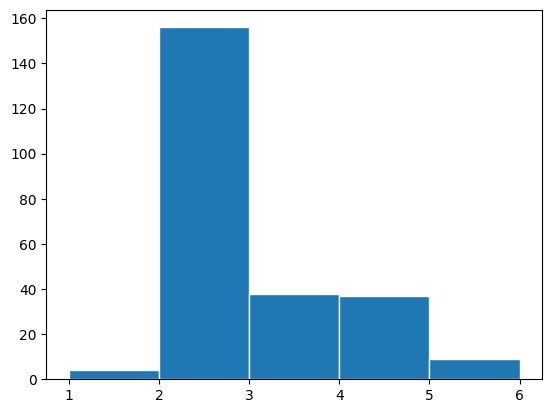

In [32]:
plt.hist(data['size'], bins = 5, edgecolor = 'white')
plt.show()

In [33]:
data['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

#### Multivariate data analysis
 - _describe relationships among two or more columns_

#### Categorical - Categorical bivariate analysis

__How many Dinner and Lunch meals were paid for by a Female or Male guest?__

- Crosstab (or contingency table) shows frequencies of co-occurences between two categorical data columns

In [34]:
pd.crosstab(data['time'], data['gender'])

gender,Female,Male
time,,
Dinner,52,124
Lunch,35,33


In [35]:
pd.crosstab(data['time'], data['gender'], normalize = True)  ## probabilities add up to 1

gender,Female,Male
time,,
Dinner,0.213115,0.508197
Lunch,0.143443,0.135246


__Chi squared statistical test answers the following question:__
- Is there a statistically significant interdependency between gender and meal type  

In [36]:
ct = pd.crosstab(data['time'], data['gender'])
ct

gender,Female,Male
time,,
Dinner,52,124
Lunch,35,33


- Compute the chi2 statistic and examine the p value
- if p-value is small (< 0.05) then the effect is statistically significant

In [37]:
chi, pval, dof, expval = stats.chi2_contingency(ct)
pval

0.002237400118075248

In [38]:
## we can also add an aggregating function into our crosstab 

pd.crosstab(data['time'], data['gender'], values = data['tip_percentage'], aggfunc='mean')

gender,Female,Male
time,,
Dinner,16.932157,15.540653
Lunch,16.228493,16.608263


#### Numerical - Numerical bivariate analysis

##### Correlation

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

In [39]:
data.corr()

,total_bill,tip,size,tip_percentage
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_percentage,-0.338624,0.342370,-0.142860,1.000000


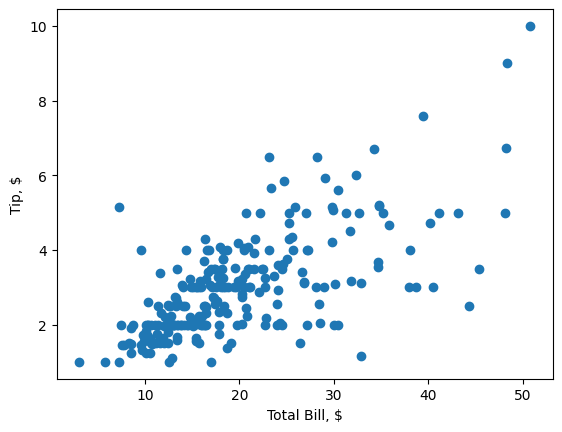

In [40]:
plt.scatter(data['total_bill'], data['tip'])
plt.xlabel('Total Bill, $')
plt.ylabel('Tip, $')
plt.show()

#### numerical - categorical bivariate analysis

Comnpute mean of tip percentage for gender = "female", or for meal = "Lunch" etc.

In [41]:
data[data['gender'] == 'Female']['tip_percentage'].mean()

16.649073632892478

In [42]:
## same for male customers
data[data['gender'] == 'Male']['tip_percentage'].mean()

15.765054700429742

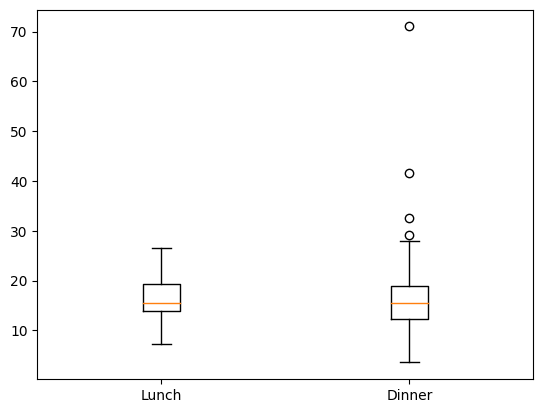

In [43]:
## more in-depth:

plt.boxplot(x = [data[data['time'] == 'Lunch']['tip_percentage'], 
                 data[data['time'] == 'Dinner']['tip_percentage']],
           labels = ["Lunch", "Dinner"])

plt.show()

In [44]:
data.groupby('gender').mean()

,total_bill,tip,size,tip_percentage
gender,,,,
Female,18.056897,2.833448,2.459770,16.649074
Male,20.744076,3.089618,2.630573,15.765055


In [45]:
data.groupby(['gender', 'time']).median()

total_bill   tip  size  tip_percentage
gender time                                          
Female Dinner       17.19  3.00   2.0       16.070473
       Lunch        13.42  2.01   2.0       15.384615
Male   Dinner       19.63  3.00   2.0       15.095887
       Lunch        16.58  2.31   2.0       15.673800

In [46]:
### Statistical test to compare data in different gropus: ANOVA
stats.f_oneway(data[data['time'] == 'Lunch']['tip_percentage'], 
                 data[data['time'] == 'Dinner']['tip_percentage'])

## p-value is the measure of statistical significance
## p-value must be low (< 0.05)

F_onewayResult(statistic=0.27866445399578593, pvalue=0.5980616074405491)